In [1]:
import pandas as pd

data = pd.read_csv('Data/airfoil_self_noise.dat', sep='\t', header=None)
data.columns = ['frequency', 'angle_of_attack', 'chord_length', 'free_stream_velocity', 'suction_side', 'pressure_side']
data.head()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side,pressure_side
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   frequency             1503 non-null   int64  
 1   angle_of_attack       1503 non-null   float64
 2   chord_length          1503 non-null   float64
 3   free_stream_velocity  1503 non-null   float64
 4   suction_side          1503 non-null   float64
 5   pressure_side         1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [2]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.33, random_state=42)
X_train.head()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side
845,500,11.2,0.0508,71.3,0.014072
1026,10000,4.8,0.0254,55.5,0.000873
621,2000,7.2,0.1524,39.6,0.009092
1371,630,6.7,0.1016,31.7,0.005929
195,6300,0.0,0.2286,71.3,0.002143


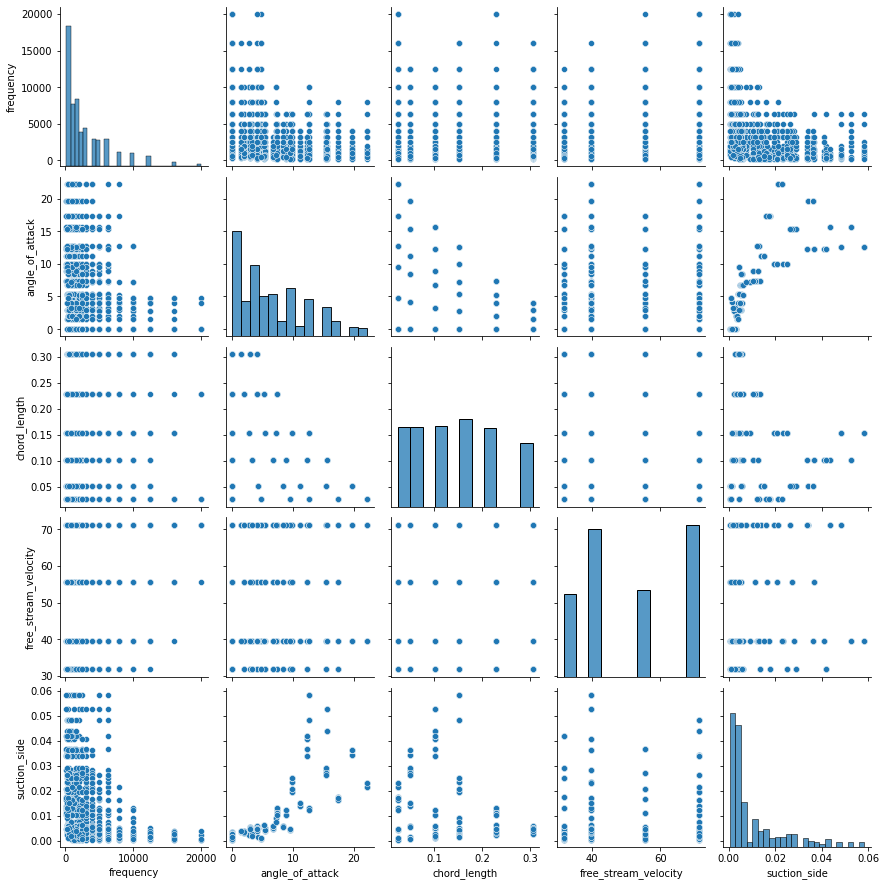

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(X_train)
plt.show()

In [14]:
data.corr()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side,pressure_side
frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
angle_of_attack,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
chord_length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
free_stream_velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
suction_side,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
pressure_side,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


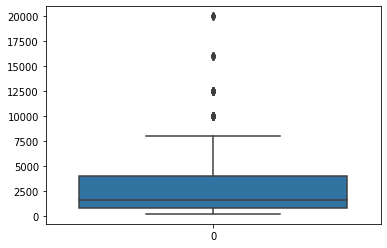

In [16]:
sns.boxplot(data = X_train['frequency'])
plt.show()

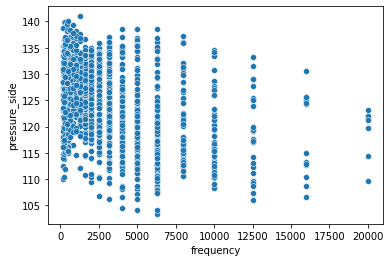

In [17]:
sns.scatterplot(x = data.frequency, y=data.pressure_side)
plt.show()

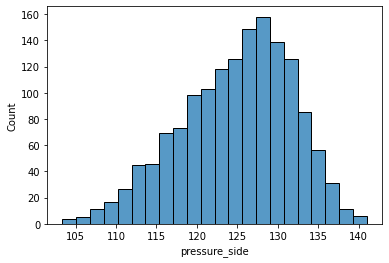

In [18]:
sns.histplot(data=data.pressure_side)
plt.show()

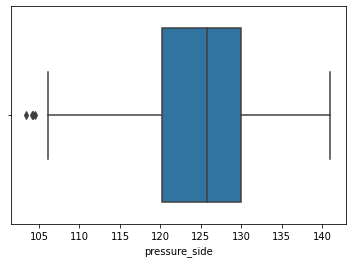

In [19]:
sns.boxplot(x=data.pressure_side)
plt.show()

In [3]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import GridSearchCV
regressor = RFR(verbose=1)
parameters = {
    'n_estimators' : [100, 200, 300],
     'criterion': ['squared_error', 'absolute_error'],
     'max_depth' : [5, 8, 9, 10],

}
model = GridSearchCV(estimator=regressor, param_grid=parameters, cv=4, verbose=1)
model.fit(X_train, y_train)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=4, estimator=RandomForestRegressor(verbose=1),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [5, 8, 9, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [4]:
model.best_params_

{'criterion': 'squared_error', 'max_depth': 10, 'n_estimators': 300}

In [5]:
model.best_score_

0.8913009378360315

In [6]:
regressor = RFR(n_estimators=300, max_depth=10, criterion='squared_error')
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=300)

In [7]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [8]:
y_pred = regressor.predict(X_test)

In [9]:
r2_score(y_test, y_pred)

0.9152088338485878

In [11]:
mean_absolute_error(y_test, y_pred)

1.4847926600782035

In [25]:
from sklearn.svm import SVR
model = SVR(kernel='rbf')
model.fit(X_train, y_train)
prediction = model.predict(X_test)


In [26]:
r2_score(y_test, prediction)

0.11649932904323934

In [27]:
mean_absolute_error(y_test, prediction)

5.031180693938792

In [12]:
import joblib as jb

In [13]:
jb.dump(regressor, 'Data/model.joblib')

['Data/model.joblib']